<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/Keras_for_Beginners_RNN_Custom_Data_Victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train_data = {
  'good': True,
  'bad': False,
  'happy': True,
  'sad': False,
  'not good': False,
  'not bad': True,
  'not happy': False,
  'not sad': True,
  'very good': True,
  'very bad': False,
  'very happy': True,
  'very sad': False,
  'i am happy': True,
  'this is good': True,
  'i am bad': False,
  'this is bad': False,
  'i am sad': False,
  'this is sad': False,
  'i am not happy': False,
  'this is not good': False,
  'i am not bad': True,
  'this is not sad': True,
  'i am very happy': True,
  'this is very good': True,
  'i am very bad': False,
  'this is very sad': False,
  'this is very happy': True,
  'i am good not bad': True,
  'this is good not bad': True,
  'i am bad not good': False,
  'i am good and happy': True,
  'this is not good and not happy': False,
  'i am not at all good': False,
  'i am not at all bad': True,
  'i am not at all happy': False,
  'this is not at all sad': True,
  'this is not at all happy': False,
  'i am good right now': True,
  'i am bad right now': False,
  'this is bad right now': False,
  'i am sad right now': False,
  'i was good earlier': True,
  'i was happy earlier': True,
  'i was bad earlier': False,
  'i was sad earlier': False,
  'i am very bad right now': False,
  'this is very good right now': True,
  'this is very sad right now': False,
  'this was bad earlier': False,
  'this was very good earlier': True,
  'this was very bad earlier': False,
  'this was very happy earlier': True,
  'this was very sad earlier': False,
  'i was good and not bad earlier': True,
  'i was not good and not happy earlier': False,
  'i am not at all bad or sad right now': True,
  'i am not at all good or happy right now': False,
  'this was not happy and not good earlier': False,
}

test_data = {
  'this is happy': True,
  'i am good': True,
  'this is not happy': False,
  'i am not good': False,
  'this is not bad': True,
  'i am not sad': True,
  'i am very good': True,
  'this is very bad': False,
  'i am very sad': False,
  'this is bad not good': False,
  'this is good and happy': True,
  'i am not good and not happy': False,
  'i am not at all sad': True,
  'this is not at all good': False,
  'this is not at all bad': True,
  'this is good right now': True,
  'this is sad right now': False,
  'this is very bad right now': False,
  'this was good earlier': True,
  'i was not happy and not good earlier': False,
}

In [ ]:
X_train = list(train_data.keys())
y_train = list(train_data.values())
X_test = list(test_data.keys())
y_test = list(test_data.values())

In [ ]:
X_train


['good',
 'bad',
 'happy',
 'sad',
 'not good',
 'not bad',
 'not happy',
 'not sad',
 'very good',
 'very bad',
 'very happy',
 'very sad',
 'i am happy',
 'this is good',
 'i am bad',
 'this is bad',
 'i am sad',
 'this is sad',
 'i am not happy',
 'this is not good',
 'i am not bad',
 'this is not sad',
 'i am very happy',
 'this is very good',
 'i am very bad',
 'this is very sad',
 'this is very happy',
 'i am good not bad',
 'this is good not bad',
 'i am bad not good',
 'i am good and happy',
 'this is not good and not happy',
 'i am not at all good',
 'i am not at all bad',
 'i am not at all happy',
 'this is not at all sad',
 'this is not at all happy',
 'i am good right now',
 'i am bad right now',
 'this is bad right now',
 'i am sad right now',
 'i was good earlier',
 'i was happy earlier',
 'i was bad earlier',
 'i was sad earlier',
 'i am very bad right now',
 'this is very good right now',
 'this is very sad right now',
 'this was bad earlier',
 'this was very good earli

## 3. Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))

### 3.1 Text Vectorization

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 20
max_len = 5
vectorize_layer = TextVectorization(
  # Max vocab size. Any words outside of the max_tokens most common ones
  # will be treated the same way: as "out of vocabulary" (OOV) tokens.
  max_tokens=max_tokens,
  # Output integer indices, one per string token
  output_mode="int",
  # Always pad or truncate to exactly this many tokens
  output_sequence_length=max_len,
)

In [ ]:
# Call adapt(), which fits the TextVectorization layer to our text dataset.
# This is when the max_tokens most common words (i.e. the vocabulary) are selected.
vectorize_layer.adapt(X_train)

In [ ]:
reverse_word_index = vectorize_layer.get_vocabulary()
reverse_word_index

['',
 '[UNK]',
 'not',
 'i',
 'this',
 'good',
 'bad',
 'am',
 'very',
 'happy',
 'is',
 'sad',
 'was',
 'earlier',
 'right',
 'now',
 'at',
 'all',
 'and',
 'or']

In [ ]:
vectorize_layer.get_weights()

[array([b'and', b'good', b'i', b'[UNK]', b'or', b'was', b'not', b'very',
        b'', b'am', b'at', b'happy', b'this', b'is', b'sad', b'bad',
        b'right', b'now', b'earlier', b'all'], dtype=object),
 array([18,  5,  3,  1, 19, 12,  2,  8,  0,  7, 16,  9,  4, 10, 11,  6, 14,
        15, 13, 17])]

In [ ]:
model.add(vectorize_layer)

## 3.2 Embedding

In [ ]:
from tensorflow.keras.layers import Embedding

# Note that we're using max_tokens + 1 here, since there's an
# out-of-vocabulary (OOV) token that gets added to the vocab.
model.add(Embedding(max_tokens + 1, 8))

## 3.3 The Recurrent Layer

In [ ]:
from tensorflow.keras.layers import LSTM, SimpleRNN

# 64 is the "units" parameter, which is the
# dimensionality of the output space.
model.add(LSTM(16))

In [ ]:
from tensorflow.keras.layers import Dense

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 5)                 0         
_________________________________________________________________
embedding (Embedding)        (None, 5, 8)              168       
_________________________________________________________________
lstm (LSTM)                  (None, 16)                1600      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 2,057
Trainable params: 2,057
Non-trainable params: 0
_________________________________________________________________


## 4. Compiling the Model


In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

## 5. Training the Model


In [ ]:
history = model.fit(X_train, y_train, epochs=200)


Epoch 1/200
2/2 [==============================] - 8s 10ms/step - loss: 0.6932 - accuracy: 0.4573
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5449
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6922 - accuracy: 0.5449
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6907 - accuracy: 0.5970
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6911 - accuracy: 0.5553
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6910 - accuracy: 0.5449
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6900 - accuracy: 0.5657
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.5553
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.5136
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.5449
Epoch 11/200
2/2 [==========

In [ ]:
import matplotlib.pylab as plt


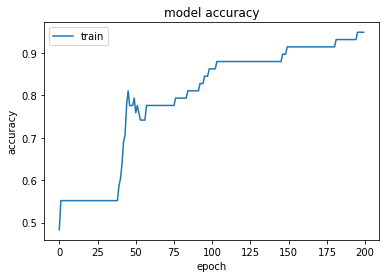

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


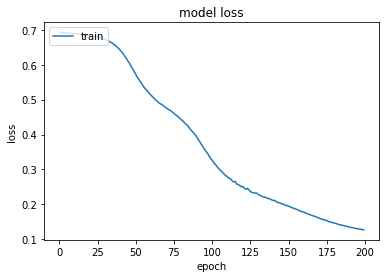

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(model.predict([
  "very good",
]))

[[0.9999889]]


In [ ]:
print(model.predict([
  "very bad",
]))

[[0.00029661]]


In [ ]:
# First get the weights of the embedding layer
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(21, 8)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_tokens):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model2 = Sequential()
model2.add(Input(shape=(1,), dtype="string"))
model2.add(vectorize_layer)
model2.add(Embedding(max_tokens + 1, 8))
model2.add(SimpleRNN(16))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 5)                 0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 5, 8)              168       
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 857
Trainable params: 857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
history = model2.fit(X_train, y_train, epochs=200)


Epoch 1/200
2/2 [==============================] - 1s 12ms/step - loss: 0.6965 - accuracy: 0.4321
Epoch 2/200
2/2 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.4217
Epoch 3/200
2/2 [==============================] - 0s 10ms/step - loss: 0.6921 - accuracy: 0.4447
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6883 - accuracy: 0.4770
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 0.6886 - accuracy: 0.5460
Epoch 6/200
2/2 [==============================] - 0s 10ms/step - loss: 0.6858 - accuracy: 0.6106
Epoch 7/200
2/2 [==============================] - 0s 10ms/step - loss: 0.6830 - accuracy: 0.6210
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6813 - accuracy: 0.6555
Epoch 9/200
2/2 [==============================] - 0s 10ms/step - loss: 0.6790 - accuracy: 0.7004
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6759 - accuracy: 0.6889
Epoch 11/200
2/2 [====

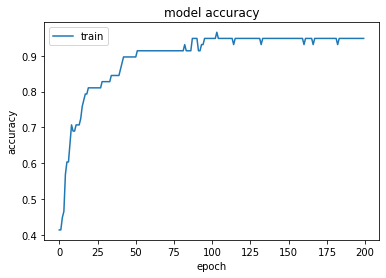

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
